In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use(['science','notebook'])

import sys
sys.path.append("../")
from fmt1d import FMTspherical
from fire import optimize_fire2

In [2]:
sigma = 1.0
eps = 0.71

In [3]:
rhob = 0.84
kT = 0.71
beta = 1/kT

In [4]:
d = sigma*(1+0.2977*kT)/(1+0.33163*kT+0.0010477*kT**2)
delta = 0.01*d
N = 900
L = N*delta

nsig = int(0.5*sigma/delta)
r = np.arange(0,L,delta)+0.5*delta
Vol = 4*np.pi*L**3/3

In [5]:
Vext = beta*4*eps*((sigma/r)**12-(sigma/r)**6)
Vext[Vext>beta*1e4] = beta*1e4

Text(0, 0.5, '$\\beta V_{ext}(r)$')

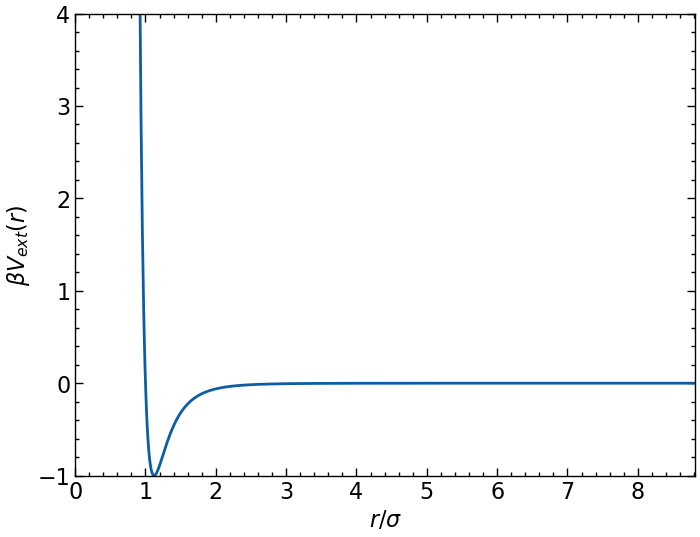

In [6]:
plt.plot(r,Vext)
plt.ylim(-1,4)
plt.xlim(0.0,r[-1])
plt.xlabel(r'$r/\sigma$')
plt.ylabel(r'$\beta V_{ext}(r)$')

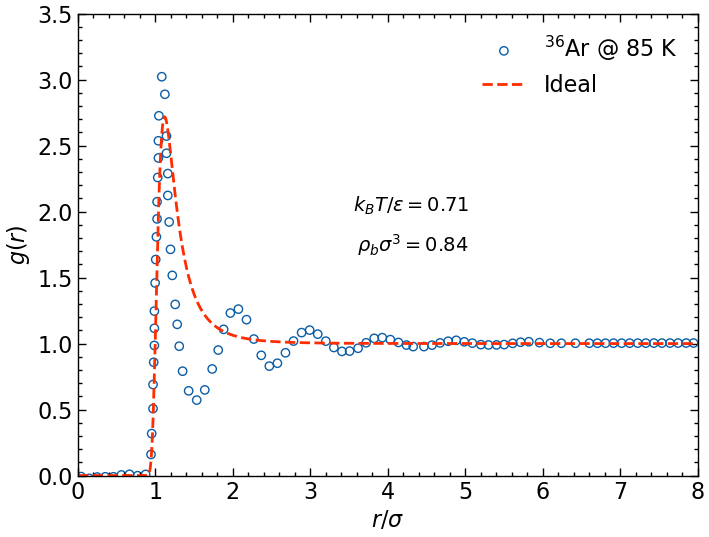

In [7]:
df = pd.read_excel('../MCdata/MCdata-radialdistribution-lennardjones-Verlet1968.xls',sheet_name='Argon') # Shukla2000

plt.scatter(df['r']/3.405,df['KT=0.71-rhob=0.84'],marker='o',edgecolors='C0',facecolors='none',label=r'${}^{36}$Ar @ 85 K')
plt.plot(r,np.exp(-Vext),'--',color='C3',label='Ideal')
plt.xlabel(r'$r/\sigma$')
plt.ylabel(r'$g(r)$')
plt.text(3.55,2.0,r'$k_B T/\epsilon = 0.71$',fontsize=14)
plt.text(3.6,1.7,r'$\rho_b \sigma^3 = 0.84$',fontsize=14)
plt.xlim(0.0,8.0)
plt.ylim(0,3.5)
plt.legend(loc='best')
plt.show()

# Fundamental Measure Theory

In [8]:
fmt = FMTspherical(N,delta,d=d)
mu = np.log(rhob) + fmt.mu(rhob)

In [16]:
n0 = np.ones(N,dtype=np.float32)
n0[:nsig] = 1.0e-16

def Omega(lnn,mu):
    n = np.exp(lnn)
    phi = fmt.Phi(n)
    Omegak = n*(np.log(n)-1.0) + phi - mu*n + Vext*n
    return np.sum(4*np.pi*r**2*Omegak*delta)/Vol

def dOmegadnR(lnn,mu):
    n = np.exp(lnn)
    dOmegadrho = n*4*np.pi*r**2*(np.log(n) -fmt.c1(n)- mu + Vext)*delta
    return dOmegadrho/Vol

n = n0.copy()

lnn = np.log(n0)+np.log(rhob)

[lnnsol,Omegasol,Niter] = optimize_fire2(lnn,Omega,dOmegadnR,mu,alpha0=0.62,rtol=1.0e-5,dt=2.6,logoutput=False)

n = np.exp(lnnsol)

nmean = np.sum(n*4*np.pi*r**2*delta)/Vol

Omegasol,nmean, Niter

(-6.33749386313128, 0.842783616326642, 1176)

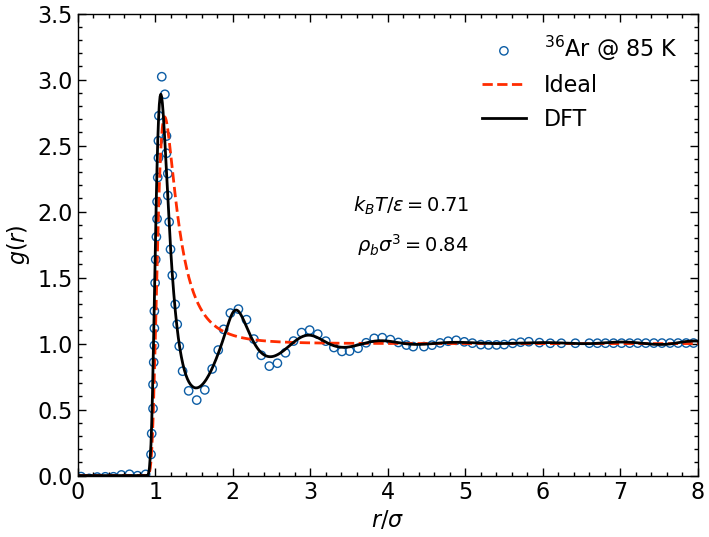

In [17]:
df = pd.read_excel('../MCdata/MCdata-radialdistribution-lennardjones-Verlet1968.xls',sheet_name='Argon') # Shukla2000

plt.scatter(df['r']/3.405,df['KT=0.71-rhob=0.84'],marker='o',edgecolors='C0',facecolors='none',label=r'${}^{36}$Ar @ 85 K')
plt.plot(r,np.exp(-Vext),'--',color='C3',label='Ideal')
plt.plot(r,n/rhob,'k',label='DFT')
plt.xlabel(r'$r/\sigma$')
plt.ylabel(r'$g(r)$')
plt.text(3.55,2.0,r'$k_B T/\epsilon = 0.71$',fontsize=14)
plt.text(3.6,1.7,r'$\rho_b \sigma^3 = 0.84$',fontsize=14)
plt.xlim(0.0,8.0)
plt.ylim(0,3.5)
plt.legend(loc='best')
plt.show()